## PRODIGY_TAXK_03


### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('bank.csv')
#df.rename(columns={'y':'deposit'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
df.shape

(11162, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
df.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
cat_col=df.select_dtypes(include='object').columns
print(cat_col)
num_col=df.select_dtypes(exclude='object').columns
print(num_col)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [13]:
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [14]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [15]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


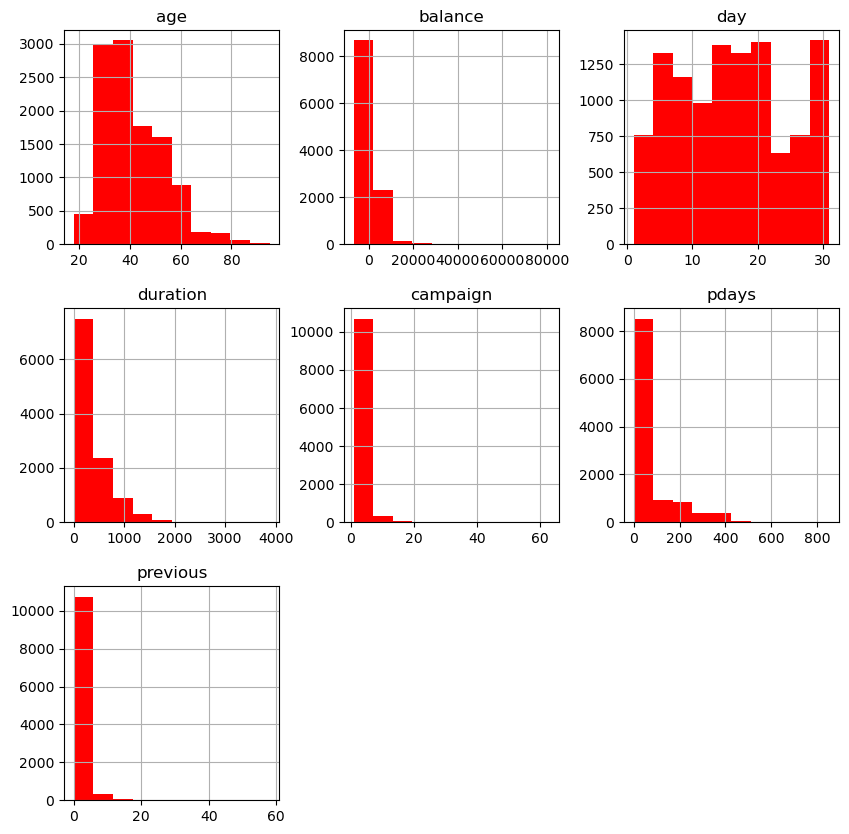

In [16]:
df.hist(figsize=(10,10),color='red')
plt.show()

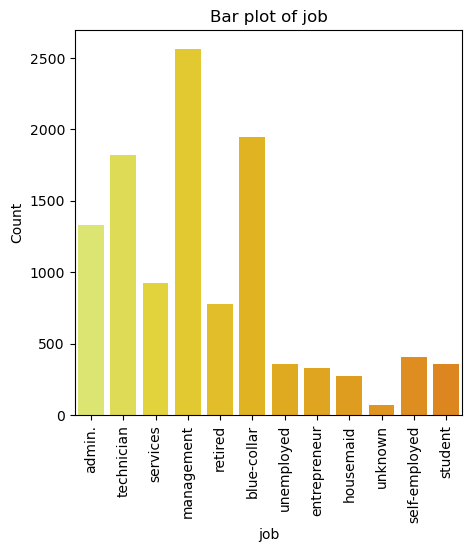

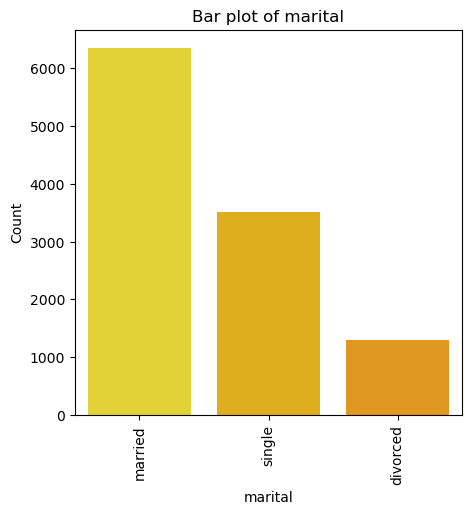

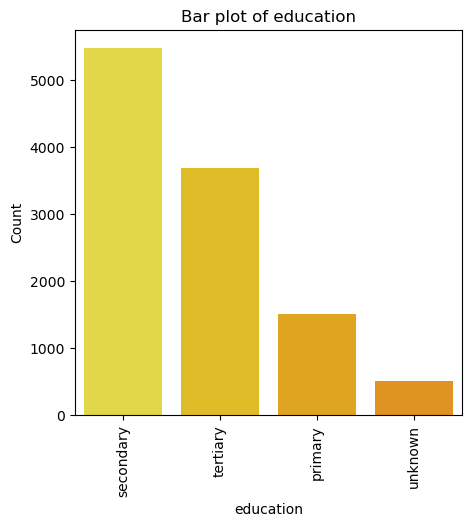

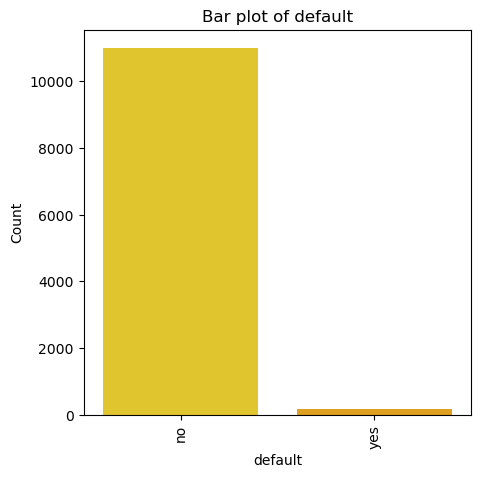

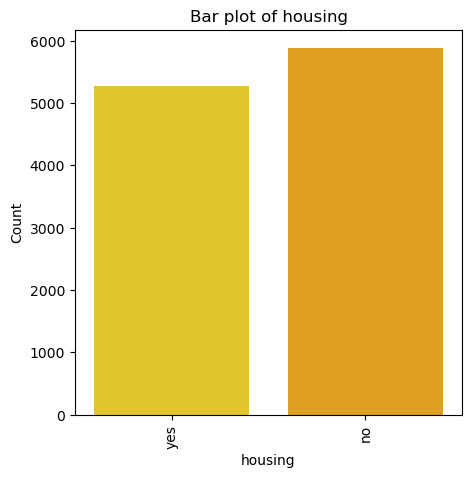

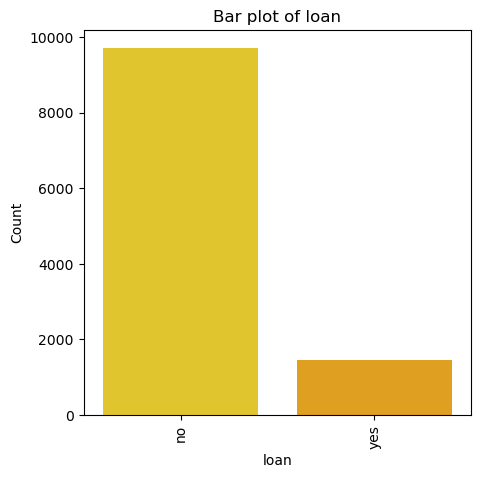

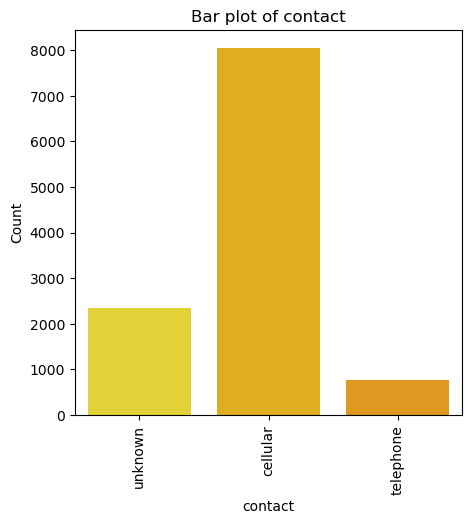

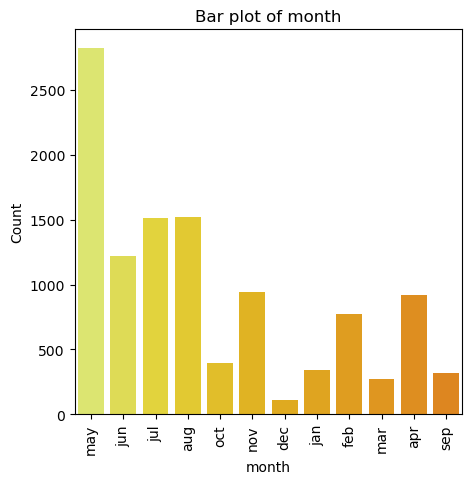

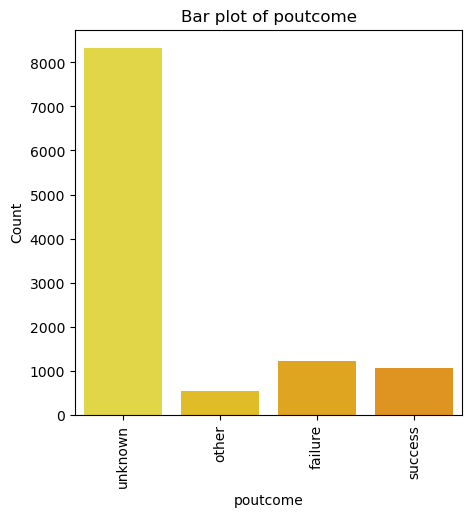

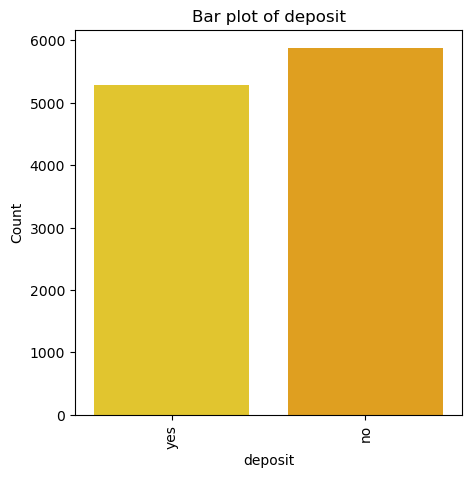

In [17]:
for feature in cat_col:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature,data=df,palette='Wistia')
    plt.title(f'Bar plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

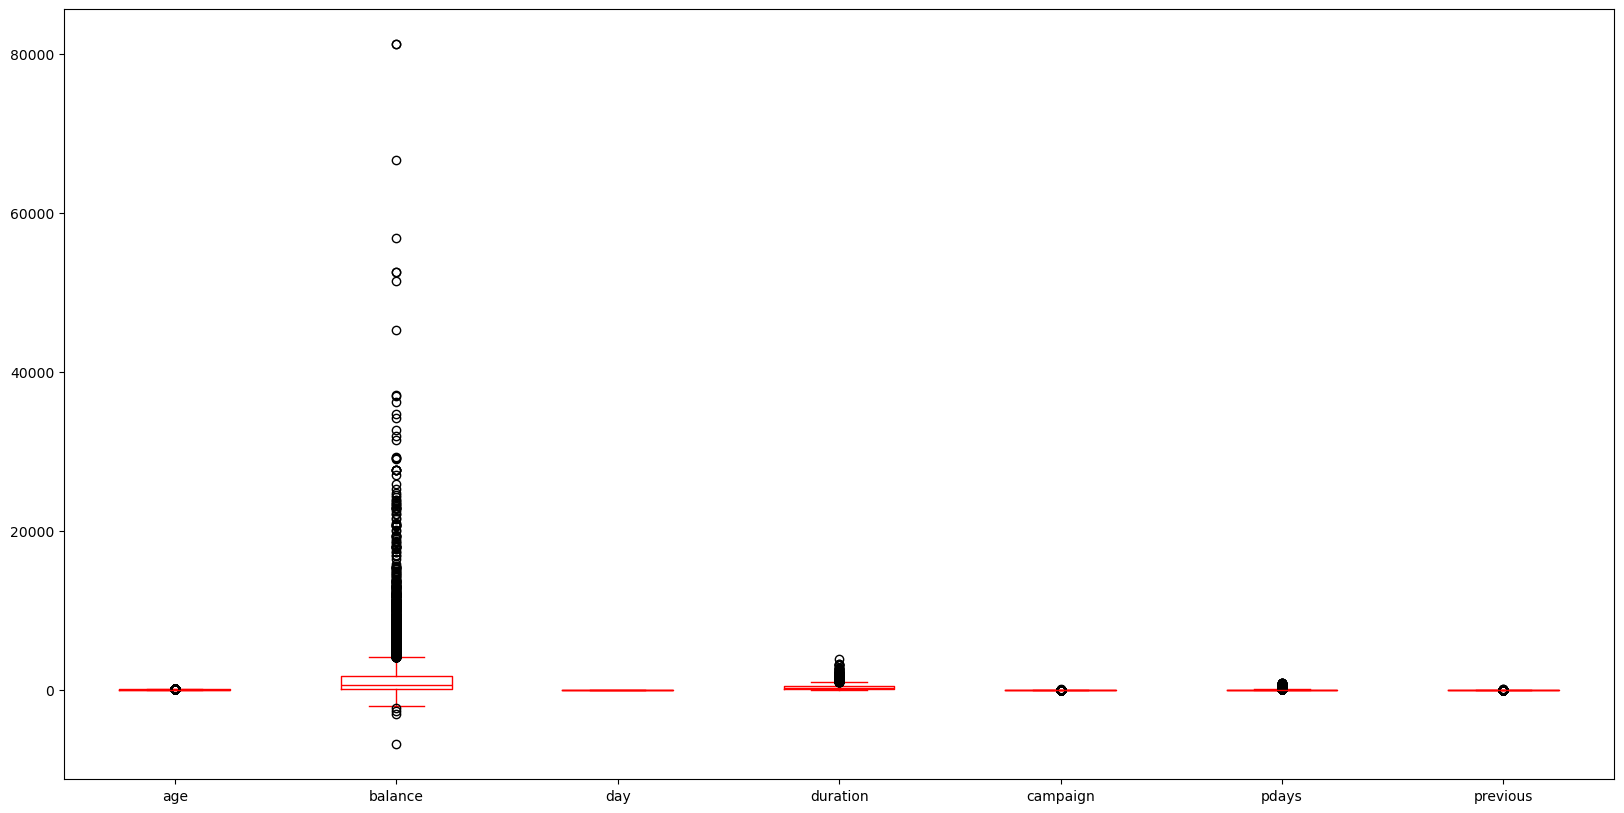

In [18]:
df.plot(kind='box',layout=(20,50),figsize=(20,10),color='red')
plt.show()

In [19]:
column=df[['age','campaign','duration']]
Q1=np.percentile(column,25)
Q3=np.percentile(column,75)
iqr=Q3 - Q1
lower_bound=Q1-1.5*iqr
upper_bound=Q3-1.5*iqr
df[['age','campaign','duration']] = column[(column>lower_bound) & (column < upper_bound)]

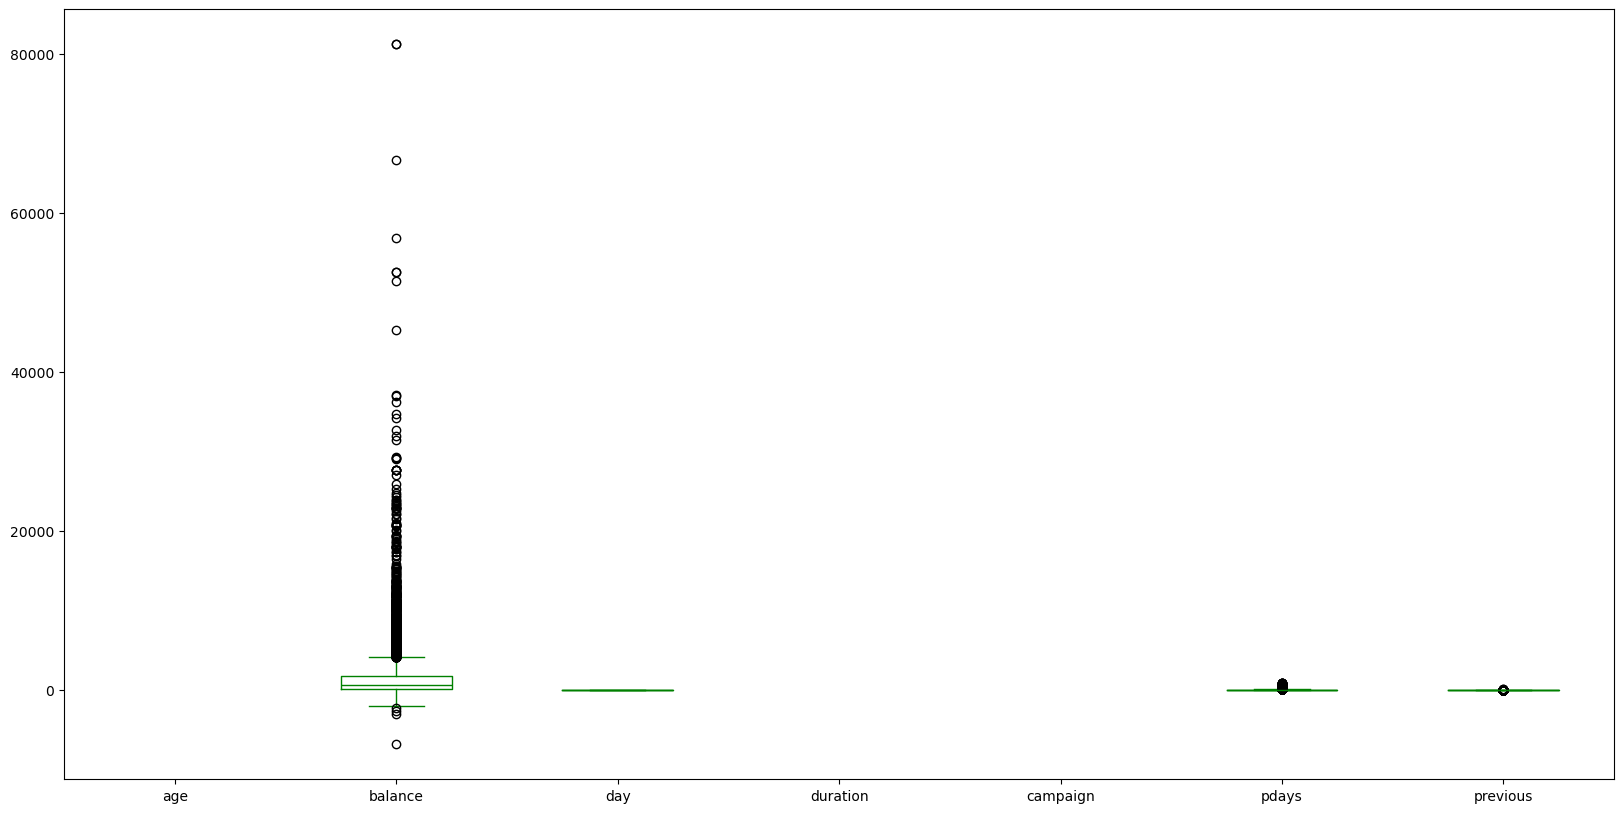

In [20]:
df.plot(kind='box',layout=(2,5),figsize=(20,10),color='green')
plt.show()

           age  job  marital  education  default   balance  housing  loan  \
age        NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
job        NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
marital    NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
education  NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
default    NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
balance    NaN  NaN      NaN        NaN      NaN  1.000000      NaN   NaN   
housing    NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
loan       NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
contact    NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
day        NaN  NaN      NaN        NaN      NaN  0.010467      NaN   NaN   
month      NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   
duration   NaN  NaN      NaN        NaN      NaN       NaN      NaN   NaN   

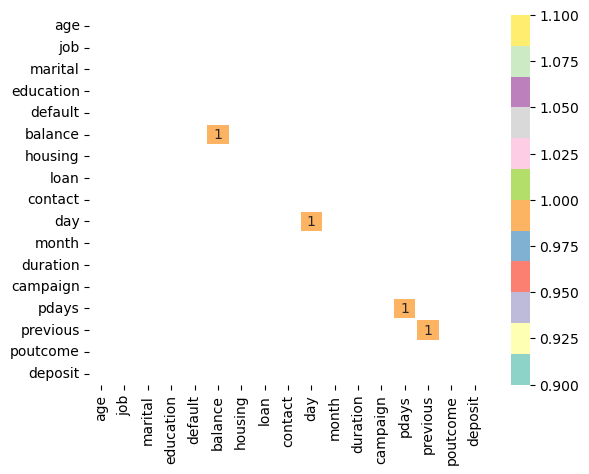

In [21]:
df=df.apply(pd.to_numeric,errors='coerce')
corr=df.corr()
print(corr)
corr=corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()


In [22]:
high_corr_cols=['pdays','previous']

In [23]:
df1=df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [24]:
df1.drop(high_corr_cols,inplace=True,axis=1) #axis 1 means column
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'deposit'],
      dtype='object')

In [25]:
df1.shape

(11162, 15)

In [26]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_encoded=df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,deposit
0,0,0,0,0,0,2288,0,0,0,4,0,0,0,0,0
1,0,0,0,0,0,469,0,0,0,4,0,0,0,0,0
2,0,0,0,0,0,1618,0,0,0,4,0,0,0,0,0
3,0,0,0,0,0,2356,0,0,0,4,0,0,0,0,0
4,0,0,0,0,0,608,0,0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,0,0,0,0,425,0,0,0,19,0,0,0,0,0
11158,0,0,0,0,0,1149,0,0,0,15,0,0,0,0,0
11159,0,0,0,0,0,453,0,0,0,18,0,0,0,0,0
11160,0,0,0,0,0,424,0,0,0,7,0,0,0,0,0


In [27]:
df_encoded['deposit'].value_counts()

deposit
0    11162
Name: count, dtype: int64

In [28]:
x=df_encoded.drop('deposit',axis=1)
y=df_encoded['deposit']
print(x)
print(x.shape)
print(y.shape)
print(y)
print(type(x))
print(type(y))

       age  job  marital  education  default  balance  housing  loan  contact  \
0        0    0        0          0        0     2288        0     0        0   
1        0    0        0          0        0      469        0     0        0   
2        0    0        0          0        0     1618        0     0        0   
3        0    0        0          0        0     2356        0     0        0   
4        0    0        0          0        0      608        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157    0    0        0          0        0      425        0     0        0   
11158    0    0        0          0        0     1149        0     0        0   
11159    0    0        0          0        0      453        0     0        0   
11160    0    0        0          0        0      424        0     0        0   
11161    0    0        0          0        0      424        0     0        0   

       day  month  duration

In [29]:
from sklearn.model_selection import train_test_split
print(4119*0.25)

1029.75


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(8371, 14)
(2791, 14)
(8371,)
(2791, 14)


In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def ev_model(y_test,y_pred):
    acc=accuracy_score(y_test,y_pred)
    print("Accuracy_Score",acc)
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix\n",cm)
    cf=classification_report(y_test,y_pred)
    print("Classification Report\n",cf)
def mscore(model):
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print("Training Score",train_score)
    print("Testing Score",test_score)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [33]:
mscore(dt)

Training Score 1.0
Testing Score 1.0


In [34]:
ypred_dt=dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [35]:
ev_model(y_test,ypred_dt)

Accuracy_Score 1.0
Confusion Matrix
 [[2791]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791

    accuracy                           1.00      2791
   macro avg       1.00      1.00      1.00      2791
weighted avg       1.00      1.00      1.00      2791



In [36]:
from sklearn.tree import plot_tree
cn=['no','yes']
fn=x_train.columns
print(cn)
print(fn)


['no', 'yes']
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome'],
      dtype='object')


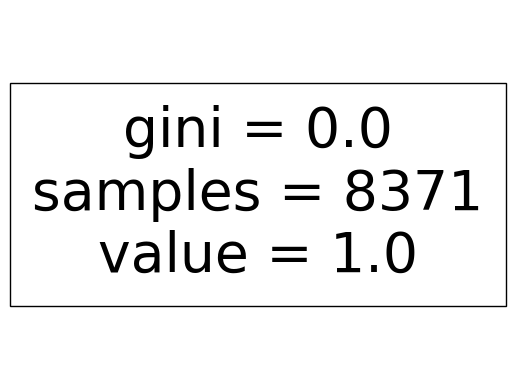

In [37]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [38]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [39]:
mscore(dt1)

Training Score 1.0
Testing Score 1.0


In [40]:
ypred_dt1=dt1.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [41]:
ev_model(y_test,ypred_dt1)

Accuracy_Score 1.0
Confusion Matrix
 [[2791]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791

    accuracy                           1.00      2791
   macro avg       1.00      1.00      1.00      2791
weighted avg       1.00      1.00      1.00      2791



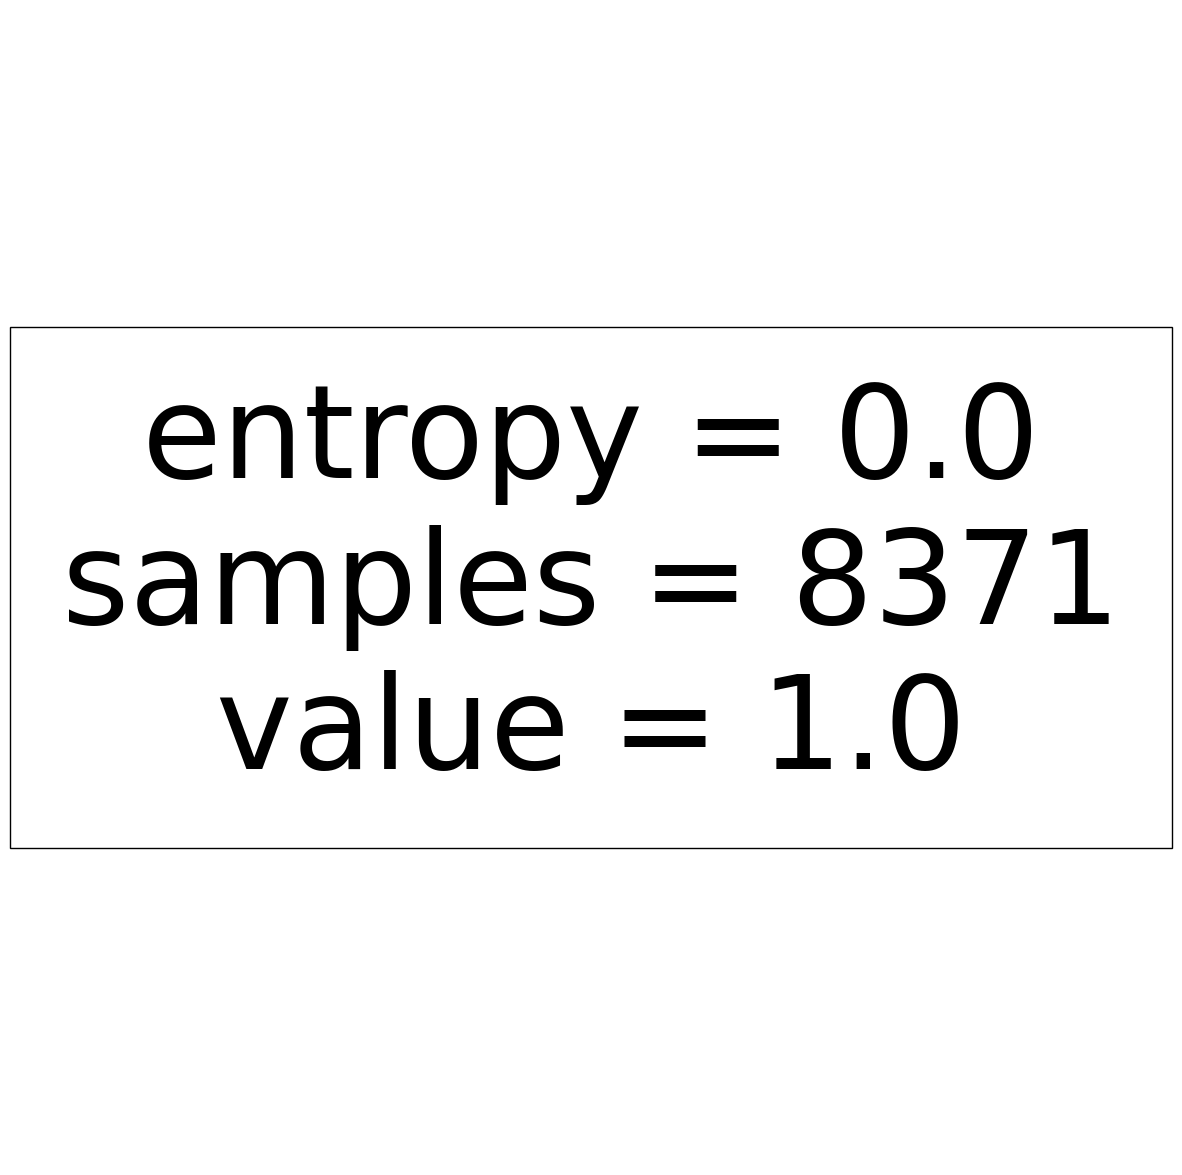

In [42]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()